<img src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_su9da4fu/def_height/1001/def_width/1911/version/100011/type/2/q/100"  width="300" height="200">

# Data Preparation

Let's create a road map to guide us through preparation.
1. Handle missing values
1. Cast data types
1. Rename columns
1. Visualize distributions of features

In [1]:
# Import libraries for cleaning data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import functions to acquire data and visualize missing values.
from acquire import get_zillow_data
from prepare import handle_missing_values, missing_values_summary

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

In [2]:
# Let's use the function we created in acquisition to acquire the data.
# assign the data to a dataframe
df = get_zillow_data()

What's the shape of our data?

In [3]:
print(f"There are {df.shape[0]} unique properties and {df.shape[1]} features.")

There are 52439 unique properties and 68 features.


| Feature | Description |
| :------ | :---------- |
| `airconditioningtypeid` | Type of cooling system present in the home (if any) |
| `architecturalstyletypeid` | Architectural style of the home (i.e. ranch,  colonial, split-level, etc…) |
| `basementsqft` | Finished living area below or partially below ground level |
| `bathroomcnt` | Number of bathrooms in home including fractional bathrooms |
| `bedroomcnt` | Number of bedrooms in home  |
| `buildingqualitytypeid` | Overall assessment of condition of the building  |from best (lowest) to worst (highest)
| `buildingclasstypeid` | The building framing type (steel frame, wood frame,   concrete/brick) |
| `calculatedbathnbr` | Number of bathrooms in home including fractional  |bathroom
| `decktypeid` | Type of deck (if any) present on parcel |
| `threequarterbathnbr` | Number of 3/4 bathrooms in house (shower + sink +  toilet) |
| `finishedfloor1squarefeet` | Size of the finished living area on the first  (entry) floor of the home
| `calculatedfinishedsquarefeet` | Calculated total finished living area of the home | 
| `finishedsquarefeet6` | Base unfinished and finished area |
| `finishedsquarefeet12` | Finished living area |
| `finishedsquarefeet13` | Perimeter  living area |
| `finishedsquarefeet15` | Total area |
| `finishedsquarefeet50` |  Size of the finished living area on the first  (entry) floor of the home |
| `fips` | Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details |
| `fireplacecnt` | Number of fireplaces in a home (if any) |
| `fireplaceflag` | Is a fireplace present in this home |
| `fullbathcnt` | Number of full bathrooms (sink, shower + bathtub, and toilet) present in home|
| `garagecarcnt` | Total number of garages on the lot including an attached garage |
| `garagetotalsqft` | Total number of square feet of all garages on lot including an attached garage |
`hashottuborspa` | Does the home have a hot tub or spa
`heatingorsystemtypeid` | Type of home heating system
`latitude` | Latitude of the middle of the parcel multiplied by 10e6
`longitude` | Longitude of the middle of the parcel multiplied by 10e6
`lotsizesquarefeet` | Area of the lot in square feet
`numberofstories` | Number of stories or levels the home has
`parcelid` | Unique identifier for parcels (lots) 
`poolcnt` | Number of pools on the lot (if any)
`poolsizesum` | Total square footage of all pools on property
`pooltypeid10` | Spa or Hot Tub
`pooltypeid2` | Pool with Spa/Hot Tub
`pooltypeid7` | Pool without hot tub
`propertycountylandusecode` | County land use code i.e. it's zoning at the county level |
| `propertylandusetypeid` | Type of land use the property is zoned for
| `propertyzoningdesc` | Description of the allowed land uses (zoning) for that property
| `rawcensustractandblock` | Census tract and block ID combined - also contains blockgroup assignment by extension
| `censustractandblock` | Census tract and block ID combined - also contains blockgroup assignment by extension
| `regionidcounty` |County in which the property is located
| `regionidcity` | City in which the property is located (if any)
| `regionidzip` | Zip code in which the property is located
| `regionidneighborhood` |Neighborhood in which the property is located
| `roomcnt` | Total number of rooms in the principal residence
| `storytypeid` | Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details."
| `typeconstructiontypeid` | What type of construction material was used to construct the home
| `unitcnt` | Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
| `yardbuildingsqft17` |Patio in  yard
| `yardbuildingsqft26` |Storage shed/building in yard
| `yearbuilt` | The Year the principal residence was built 
| `taxvaluedollarcnt` |The total tax assessed value of the parcel
| `structuretaxvaluedollarcnt` |The assessed value of the built structure on the parcel
| `landtaxvaluedollarcnt` |The assessed value of the land area of the parcel
| `taxamount` |The total property tax assessed for that assessment year
| `assessmentyear` |The year of the property tax assessment 
| `taxdelinquencyflag` |Property taxes for this parcel are past due as of 2015
| `taxdelinquencyyear` |Year for which the unpaid propert taxes were due 


# Handle Missing Values
1. Missing Values Summary
2. Drop columns with 100% of values missing
3. Salvage columns with 80-99.99% of values missing
> Repeat until all columns that have a missing value have been dropped or salvaged.

Let's look at the features of our dataset.

In [4]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,lasttransactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711855,1087254,NaN,...,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711877,1072280,NaN,...,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711888,1340933,NaN,...,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711910,1878109,NaN,...,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711923,2190858,NaN,...,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


## Missing Values Summary

In [5]:
# Use a function to calculate missing value stats.
df_missing = missing_values_summary(df)

In [6]:
missing_summary = (
    df_missing
    .sort_values(by=['num_rows_missing']
                 ,ascending=False)
                  )

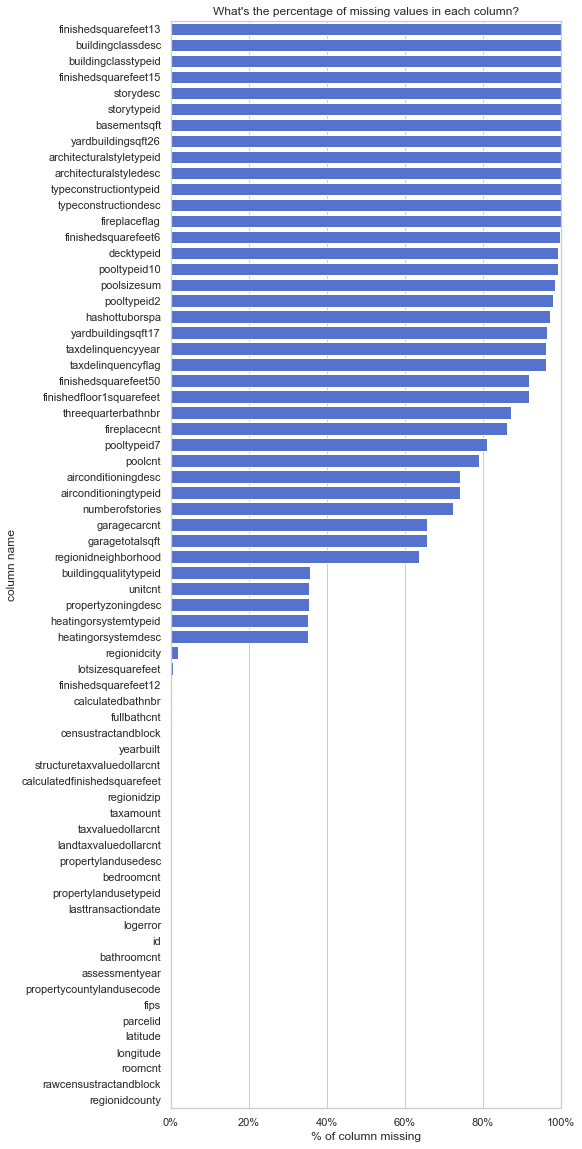

In [7]:
# Visualize the missing data.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 20))

sns.barplot(
    
    y='attribute',
    x='pct_rows_missing',
    data=missing_summary,
    orient='h',
    color='Royalblue',
)

plt.title("What's the percentage of missing values in each column?")
plt.xlabel('% of column missing')
plt.ylabel('column name')

plt.xticks(
    
    ticks=np.linspace(0, 1, 6),
    labels=['0%', '20%', '40%', '60%', '80%', '100%']
)

plt.xlim(0, 1)
plt.show()

More than half of our columns are missing a data point. Let's drop the columns that are missing between 80 and 100% of their values.

<img src="imputing_nans.jpg" width="300" height="300">

# Columns with 100% of Values Missing

In [8]:
# Let's start with 100% missing columns

features_100pct_missing = list(
    
    df_missing[df_missing.pct_rows_missing == 1] \
    .attribute.values
)

missing_summary = missing_summary[missing_summary.pct_rows_missing != 1]

In [9]:
features_100pct_missing

['buildingclasstypeid',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'buildingclassdesc']

In [10]:
# drop columns from our original dataframe
df.drop(columns=features_100pct_missing, inplace=True)

# Columns with 80-99.99% of Values Missing

Before we drop columns with greater than 80% of values let's take a look at their values to see if we can salvageable.

In [11]:
# start with > 90% missing values first
df_missing[df_missing.pct_rows_missing > .9]

,attribute,num_rows_missing,pct_rows_missing
0,typeconstructiontypeid,52363,0.998551
1,storytypeid,52392,0.999104
4,buildingclasstypeid,52439,1.000000
5,architecturalstyletypeid,52369,0.998665
9,basementsqft,52392,0.999104
14,decktypeid,52050,0.992582
15,finishedfloor1squarefeet,48060,0.916493
18,finishedsquarefeet13,52439,1.000000
19,finishedsquarefeet15,52439,1.000000
20,finishedsquarefeet50,48060,0.916493


## Salvage features

- Matching {typeid: typedesc} columns
- Pool columns (including `has hot tub or spa`)
- Columns measured in square feet
- Fire place
- Tax delinquincy columns


### Matching {typeid: typedesc} columns
1. `typeconstructiontypeid` : `typeconstructiondesc`
2. `storytypeid` : `storydesc`
3. `architecturalstyletypeid` : `architecturalstyledesc`

In [12]:
# drop this column
pd.crosstab(df.typeconstructiontypeid,
            df.typeconstructiondesc)

typeconstructiondesc,Concrete,Frame
typeconstructiontypeid,,
4.0,1,0
6.0,0,75


The story type represents how many levels/floors a property has, whether it has an attic, a basement, ect. 'Basement' is the only value in `storydesc`, let's rename it `has_basement` with values 0/1.<br>Where 0 == no basement, 1 == basement

In [13]:
# keep these columns
pd.crosstab(df.storytypeid,
            df.storydesc)

storydesc,Basement
storytypeid,
7.0,47


Note: If we had an ml algorithm that could utilize google images, we could infer the architectural style for every property. :O or infer the architectural style using clustering! (If we had more values...)

In [14]:
# drop this column
# Not enough values to infer the architectural style of a property.
pd.crosstab(df.architecturalstyletypeid,
            df.architecturalstyledesc)

architecturalstyledesc,Bungalow,Cape Cod,Contemporary,Conventional,Ranch/Rambler
architecturalstyletypeid,,,,,
2.0,2,0,0,0,0
3.0,0,3,0,0,0
7.0,0,0,62,0,0
8.0,0,0,0,1,0
21.0,0,0,0,0,2


##### Matching {typeid: typedesc} columns Summary
Colums to keep:
- `storytypeid` and `storydesc`
    - Create a new column called `has_basement` where: 0 == no basement, 1 == basement
        - Drop both columns after columns after creating the new column.

Columns to drop:
- `typeconstructiontypeid`
- `typeconstructiondesc`
- `architecturalstyletypeid`
- `architecturalstyle`

### Pool columns (including hot tub/spa)

The only value in `hashottuborspa` is 1. Let's rename it `has_hottub_or_spa` with values 0/1.<br>
Where 0 == no hottub or spa, 1 == hot tub or spa

In [15]:
# keep this column
df.hashottuborspa.value_counts()

1.0    1515
Name: hashottuborspa, dtype: int64

Each pool column has a unique value of 1, one swimming pool. `poolcnt` has the least amount of missing values. Let's salvage it. Rename `poolcnt` as `has_pool`.
<br>Where 0 == no pool, 1 == pool

In [16]:
# keep this column
# The number of pools on a property
print(df.poolcnt.value_counts(), end='\n\n')

# drop these columns
# Pool with Spa/Hot Tub
print(df.pooltypeid2.value_counts(), end='\n\n')

# Pool without hot tub
print(df.pooltypeid7.value_counts(), end='\n\n')

# Spa or Hot Tub
print(df.pooltypeid10.value_counts(), end='\n')

1.0    11096
Name: poolcnt, dtype: int64

1.0    1071
Name: pooltypeid2, dtype: int64

1.0    10009
Name: pooltypeid7, dtype: int64

1.0    444
Name: pooltypeid10, dtype: int64


Of properties that have pools, there are 262 unique pool sizes. Let's rename it as `pool_area`.

In [17]:
# Area of all pools on a property in square feet.
print(df.poolsizesum.nunique())

262


Let's take a look at the distribution of pool area in square feet.

In [18]:
df[['poolsizesum']].describe().T

,count,mean,std,min,25%,50%,75%,max
poolsizesum,867.0,518.318339,156.468209,24.0,424.5,500.0,600.0,1500.0


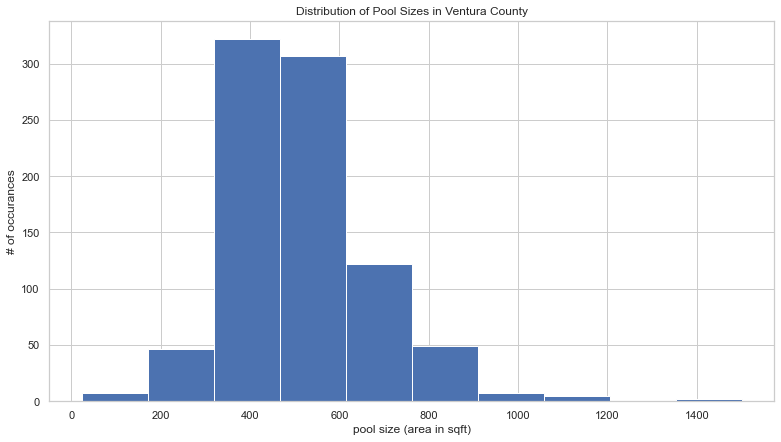

In [19]:
plt.figure(figsize=(13, 7))
df.poolsizesum.hist()

# The only properties with a pool are located in Ventura county
# See the Appendix
plt.title('Distribution of Pool Sizes in Ventura County')
plt.xlabel('pool size (area in sqft)')
plt.ylabel('# of occurances')
plt.show()

In [20]:
pd.cut(df.poolsizesum, 4).value_counts(dropna=False)

NaN                 51572
(393.0, 762.0]        672
(22.524, 393.0]       133
(762.0, 1131.0]        59
(1131.0, 1500.0]        3
Name: poolsizesum, dtype: int64

##### Pool columns (including hot tub/spa) Summary
Colums to keep:
> Drop these columns once the new ones are created.
- `hashottuborspa`
    - Create a new column called `has_hot_or_spa` with the values 0/1.<br>Where: 0 == no hottub or spa, 1 == hot tub or spa
- `poolcnt`
    - Create a new column called `has_pool`.<br>
    Where: 0 == no pool, 1 == pool
- `poolsizesum`
    - Create a new column called `pool_area`. Fill missing values with 0.
    - For those with a pool but no reported area, impute the median.

Columns to drop:
- `pooltypeid2`
- `pooltypeid7`
- `pooltypeid10`

# Columns measured in Square Feet

In [21]:
# duplicate column
np.all(df.finishedfloor1squarefeet == df.finishedsquarefeet50)

False

In [22]:
# Drop column
print(df.finishedsquarefeet6.count())

165


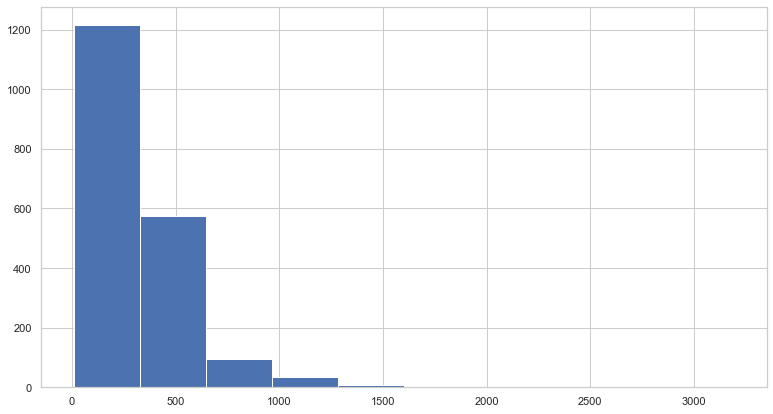

In [23]:
# Patio in yard
plt.figure(figsize=(13, 7))
df.yardbuildingsqft17.hist()
plt.show()

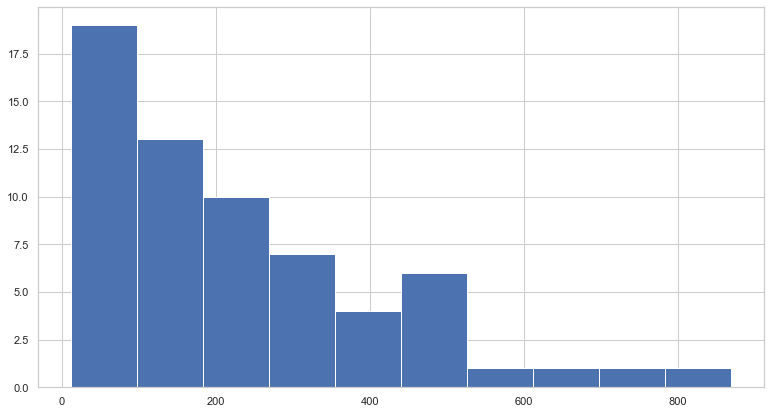

In [24]:
# Storage shed/building in yard
plt.figure(figsize=(13, 7))
df.yardbuildingsqft26.hist()
plt.show()

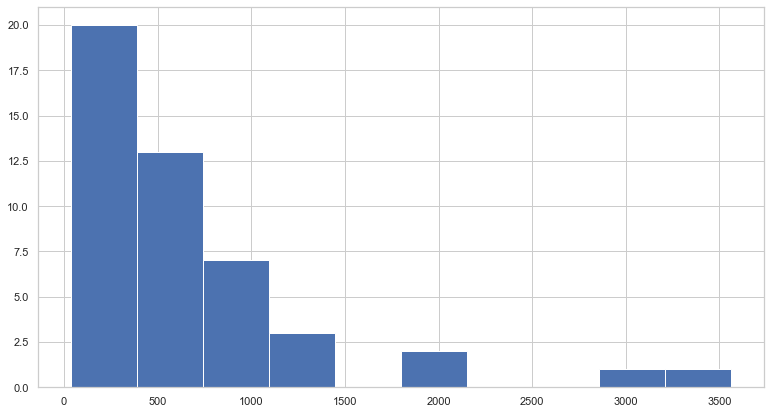

In [25]:
# Basement size in squarefeet
plt.figure(figsize=(13, 7))
df.basementsqft.hist()
plt.show()

In [26]:
df.storydesc.count() == df.basementsqft.count()

True

In [27]:
# Let's drop the columns

features_80pct_missing = [
    'pooltypeid2',
    'pooltypeid7',
    'pooltypeid10',
    
    ''
]

In [28]:
missing_summary = missing_summary[~missing_summary.attribute \
                                  .isin(features_80pct_missing)]

# Appendix

Use this snippet to load the data dictionary in your local environment once you've cloned the repository
```python
pd.read_csv('data_dictionary.csv')
```

In [29]:
# Iteration #2 Figure out what the codes mean, Mason.
df.groupby(by='fips').propertycountylandusecode.value_counts()

fips    propertycountylandusecode
6037.0  0100                         25996
        0101                          6080
        100                            786
        0104                           349
        101                            333
        010G                            94
        0103                            89
        0108                            56
        010M                            53
        104                             20
        0109                            18
        0110                             6
        0113                             6
        0141                             4
        0102                             3
        0105                             3
        103                              2
        010V                             2
        0111                             2
        0130                             2
        108                              1
        010L                             1
        0114        

In [30]:
# Properties in ventura county are the only properties that have pools!
# Make sense. Los Angeles citizens have access to the beach :).
df.groupby(by='fips').poolsizesum.value_counts().head()

fips    poolsizesum
6111.0  450.0          89
        400.0          38
        500.0          30
        600.0          27
        512.0          25
Name: poolsizesum, dtype: int64